In [184]:
#Project - DSC540 Data Wrangling
#Lenin Kamma - 4/17/2020

In [133]:
#Import libraries 
import pandas as pd
import numpy as np

In [185]:
#load covid dataset
covid_data = pd.read_csv("C:/Lenin Data Science/DSC540/Project/CaseCountData.csv")

In [149]:
#Copy dataframe  
upd_covid_data = covid_data.copy(deep=True)

In [186]:
#Rename columns
upd_covid_data = upd_covid_data.rename(columns={"date":'Date', "county":"US_county","state":'US_state',"fips":"FIPS_code", 
                                            "cases":"No_of_cases","deaths":"No_of_deaths"})
upd_covid_data

,Date,US_county,US_state,FIPS_code,No_of_cases,No_of_deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
61966,4/15/2020,Sublette,Wyoming,56035.0,1,0
61967,4/15/2020,Sweetwater,Wyoming,56037.0,10,0
61968,4/15/2020,Teton,Wyoming,56039.0,59,0
61969,4/15/2020,Uinta,Wyoming,56041.0,4,0


In [151]:
#Check for NA values in FIPS code
upd_covid_data.FIPS_code.isna().values.sum()

807

In [187]:
#Check for NA values in US state code
upd_covid_data.US_state.isna().values.sum()

0

In [153]:
#Check for NA values in US county code
upd_covid_data.US_county.isna().values.sum()

0

In [188]:
#Check for NA values in US county code
upd_covid_data[(upd_covid_data["US_county"] == 'Unknown') & (upd_covid_data["FIPS_code"].isna())]

,Date,US_county,US_state,FIPS_code,No_of_cases,No_of_deaths
418,3/1/2020,Unknown,Rhode Island,NaN,2,0
450,3/2/2020,Unknown,Rhode Island,NaN,2,0
485,3/3/2020,Unknown,Rhode Island,NaN,2,0
522,3/4/2020,Unknown,Rhode Island,NaN,2,0
569,3/5/2020,Unknown,Rhode Island,NaN,2,0
...,...,...,...,...,...,...
61652,4/15/2020,Unknown,Utah,NaN,0,9
61668,4/15/2020,Unknown,Vermont,NaN,12,0
61672,4/15/2020,Unknown,Virgin Islands,NaN,51,1
61787,4/15/2020,Unknown,Virginia,NaN,0,59


In [155]:
#Check for duplicates
upd_covid_data[upd_covid_data.duplicated()]

,Date,US_county,US_state,FIPS_code,No_of_cases,No_of_deaths


In [189]:
#None of the rows are duplicated
#807 rows have NA values in FIPS code
#734 out of 807 have unknown county names and NaN FIPS code
#Drop those 807 rows from the dataframe as they are not going to add any value

In [190]:
new_covid_data = upd_covid_data.dropna(subset=["FIPS_code"])
new_covid_data

,Date,US_county,US_state,FIPS_code,No_of_cases,No_of_deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
61966,4/15/2020,Sublette,Wyoming,56035.0,1,0
61967,4/15/2020,Sweetwater,Wyoming,56037.0,10,0
61968,4/15/2020,Teton,Wyoming,56039.0,59,0
61969,4/15/2020,Uinta,Wyoming,56041.0,4,0


In [179]:
# New shape of the dataset
print(new_covid_data.shape)

(61164, 6)


In [191]:
#remove decimal zeroes from FIPS code
new_covid_data["FIPS_code"]=new_covid_data["FIPS_code"].astype(str).replace('\.0', '', regex=True)
new_covid_data

C:\Users\Supernova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,US_county,US_state,FIPS_code,No_of_cases,No_of_deaths
0,1/21/2020,Snohomish,Washington,53061,1,0
1,1/22/2020,Snohomish,Washington,53061,1,0
2,1/23/2020,Snohomish,Washington,53061,1,0
3,1/24/2020,Cook,Illinois,17031,1,0
4,1/24/2020,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
61966,4/15/2020,Sublette,Wyoming,56035,1,0
61967,4/15/2020,Sweetwater,Wyoming,56037,10,0
61968,4/15/2020,Teton,Wyoming,56039,59,0
61969,4/15/2020,Uinta,Wyoming,56041,4,0


In [159]:
#Import library
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x15badb55788>,
 'caps': [<matplotlib.lines.Line2D at 0x15badb5f148>,
 'boxes': [<matplotlib.lines.Line2D at 0x15badb55a08>],
 'medians': [<matplotlib.lines.Line2D at 0x15badb8b688>],
 'fliers': [<matplotlib.lines.Line2D at 0x15badb741c8>],
 'means': []}

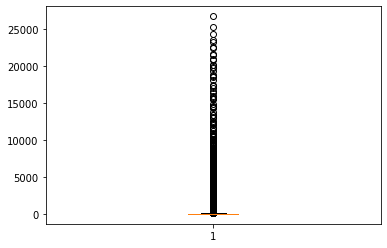

In [192]:
#Create a boxplot
plt.boxplot(new_covid_data["No_of_cases"])

In [162]:
#Import scipy library
from scipy import stats

In [181]:
#Calculate z-score
z_score = stats.zscore(new_covid_data["No_of_cases"])
#Identify datarows with z-score < -3
df = new_covid_data[(z_score < -3)]
df

,Date,US_county,US_state,FIPS_code,No_of_cases,No_of_deaths


In [193]:
#Identify datarows with z-score < 3
z_score = stats.zscore(new_covid_data["No_of_cases"])
df = new_covid_data[(z_score > 3)]
df

,Date,US_county,US_state,FIPS_code,No_of_cases,No_of_deaths
9014,3/23/2020,Nassau,New York,36059,2442,9
9039,3/23/2020,Westchester,New York,36119,2894,0
10325,3/24/2020,Nassau,New York,36059,2869,9
10351,3/24/2020,Westchester,New York,36119,3891,6
11766,3/25/2020,Nassau,New York,36059,3285,17
...,...,...,...,...,...,...
60885,4/15/2020,Westchester,New York,36119,20947,708
61241,4/15/2020,Montgomery,Pennsylvania,42091,2475,120
61246,4/15/2020,Philadelphia,Pennsylvania,42101,7441,222
61524,4/15/2020,Harris,Texas,48201,4097,58


In [ ]:
#Conclusions

In [ ]:
#486 rows are present with z-score value greater than 3
#But they add value to the project. So no additonal rows are removed from the dataset as outlier
#Final dataset has 61164 rows × 6 columns as of 4/17/2020